<a href="https://colab.research.google.com/github/david125-cmd/Challenge-Telecom-X-Parte-Dos/blob/main/TelecomX_LATAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracción de Datos

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import pickle

1. Preparación de los Datos

In [8]:
url = "https://raw.githubusercontent.com/1EduardOrtega/TelecomX_parte2_Latam/refs/heads/main/datos_tratados.csv"

In [9]:
datos_tratados = pd.read_csv(url)

In [10]:
datos_tratados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Evasion                          7043 non-null   int64  
 1   Genero                           7043 non-null   object 
 2   AdultoMayor                      7043 non-null   int64  
 3   TienePareja                      7043 non-null   int64  
 4   TieneDependientes                7043 non-null   int64  
 5   MesesCliente                     7043 non-null   int64  
 6   SuscripcionTelefono              7043 non-null   int64  
 7   LineasMultiples                  7043 non-null   int64  
 8   SeguridadOnline                  7043 non-null   int64  
 9   RespaldoOnline                   7043 non-null   int64  
 10  ProteccionDispositivo            7043 non-null   int64  
 11  SoporteTecnico                   7043 non-null   int64  
 12  TVCable             

In [11]:
datos_tratados.head()


Evasion  Genero  AdultoMayor  TienePareja  TieneDependientes  MesesCliente  \
0        0  Female            0            1                  1             9   
1        0    Male            0            0                  0             9   
2        1    Male            0            0                  0             4   
3        1    Male            1            1                  0            13   
4        1  Female            1            1                  0             3   

   SuscripcionTelefono  LineasMultiples  SeguridadOnline  RespaldoOnline  ...  \
0                    1                0                0               1  ...   
1                    1                1                0               0  ...   
2                    1                0                0               0  ...   
3                    1                0                0               1  ...   
4                    1                0                0               0  ...   

   CargoMensual  CargoTotal  Internet_Fibra  SinInternet  Contrato_1Año  \
0          65.6      593.30               0            0              1   
1          59.9      542.40               0            0              0   
2          73.9      280.85               1            0              0   
3          98.0     1237.85               1            0              0   
4          83.9      267.40               1            0              0   

   Contrato_2Años  Pago_TarjetaCredito(automatico)  Pago_ChequeElectronico  \
0               0                                0                       0   
1               0                                0                       0   
2               0                                0                       1   
3               0                                0                       1   
4               0                                0                       0   

   Pago_ChequeFisico  Cuentas_Diarias  
0                  1         2.186667  
1                  1         1.996667  
2                  0         2.463333  
3                  0         3.266667  
4                  1         2.796667  

[5 rows x 25 columns]

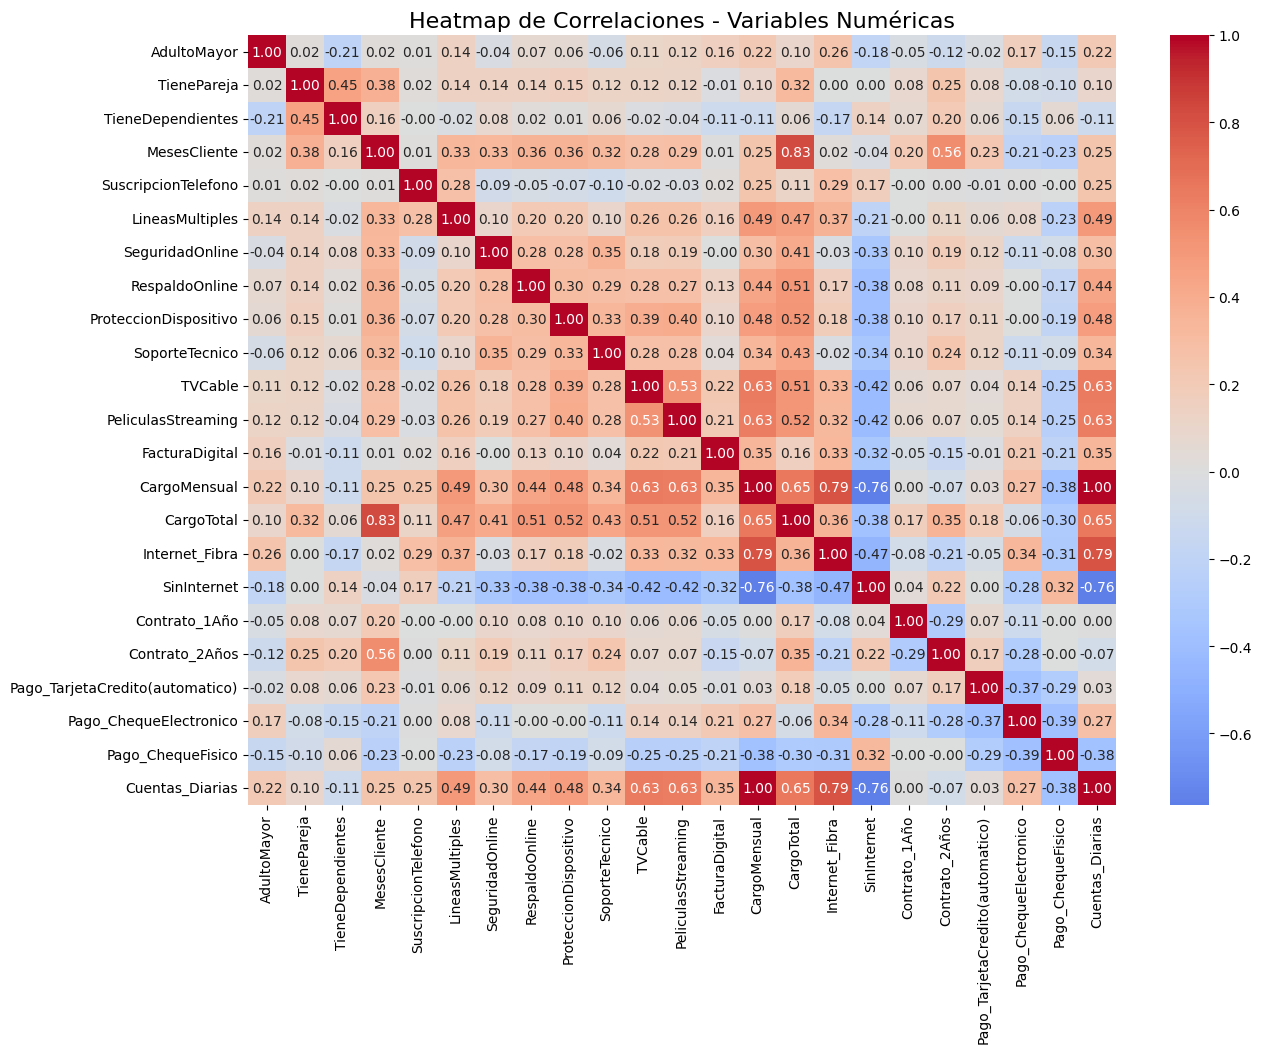

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Variable        VIF
13                     CargoMensual        inf
22                  Cuentas_Diarias        inf
4               SuscripcionTelefono  46.539912
14                       CargoTotal  21.299863
3                      MesesCliente  20.268478
15                   Internet_Fibra  17.193304
16                      SinInternet   8.035317
11               PeliculasStreaming   5.007206
10                          TVCable   4.864322
18                   Contrato_2Años   3.465791
8             ProteccionDispositivo   2.981145
12                   FacturaDigital   2.954409
20           Pago_ChequeElectronico   2.952989
7                    RespaldoOnline   2.888090
5                   LineasMultiples   2.838304
1                       TienePareja   2.827053
9                    SoporteTecnico   2.745797
6                   SeguridadOnline   2.666213
21                Pago_ChequeFisico   2.389126
17                    Contrato_1Año   2.050962
19  Pago_Tarj

In [12]:
df_numericas = datos_tratados.drop(columns=["Genero"])
df_numericas = df_numericas.select_dtypes(include=['int64', 'float64']).drop(columns=["Evasion"])


plt.figure(figsize=(14,10))
sns.heatmap(df_numericas.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap de Correlaciones - Variables Numéricas", fontsize=16)
plt.show()


vif_data = pd.DataFrame()
vif_data["Variable"] = df_numericas.columns
vif_data["VIF"] = [variance_inflation_factor(df_numericas.values, i)
                   for i in range(len(df_numericas.columns))]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

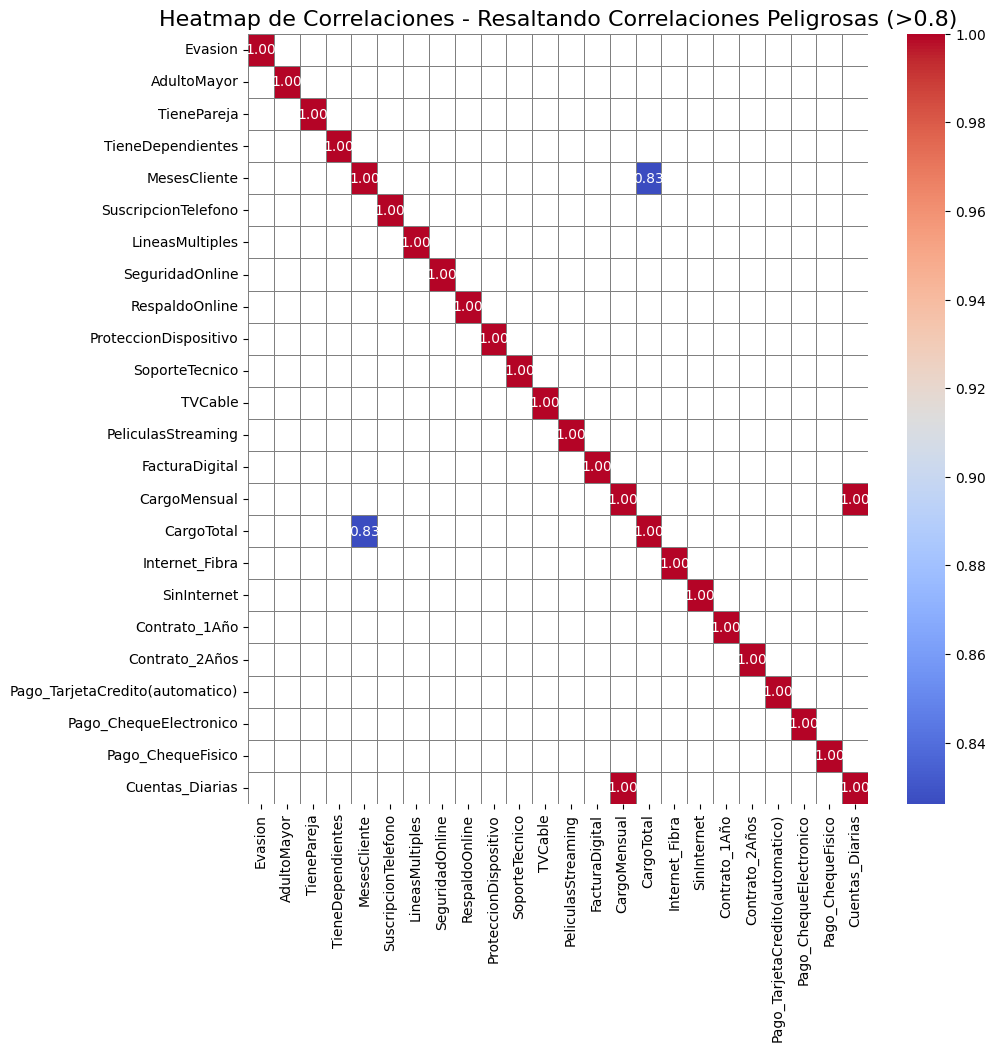

In [14]:
corr = datos_tratados.select_dtypes(include=[np.number]).corr()
mask = np.abs(corr) < 0.8

plt.figure(figsize=(10, 10))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            mask=mask,
            cbar=True,
            linewidths=0.5,
            linecolor='gray')
plt.title("Heatmap de Correlaciones - Resaltando Correlaciones Peligrosas (>0.8)", fontsize=16)
plt.show()

In [15]:
datos_tratados = datos_tratados.drop(columns=['Cuentas_Diarias'])

datos_tratados.head()

Evasion  Genero  AdultoMayor  TienePareja  TieneDependientes  MesesCliente  \
0        0  Female            0            1                  1             9   
1        0    Male            0            0                  0             9   
2        1    Male            0            0                  0             4   
3        1    Male            1            1                  0            13   
4        1  Female            1            1                  0             3   

   SuscripcionTelefono  LineasMultiples  SeguridadOnline  RespaldoOnline  ...  \
0                    1                0                0               1  ...   
1                    1                1                0               0  ...   
2                    1                0                0               0  ...   
3                    1                0                0               1  ...   
4                    1                0                0               0  ...   

   FacturaDigital  CargoMensual  CargoTotal  Internet_Fibra  SinInternet  \
0               1          65.6      593.30               0            0   
1               0          59.9      542.40               0            0   
2               1          73.9      280.85               1            0   
3               1          98.0     1237.85               1            0   
4               1          83.9      267.40               1            0   

   Contrato_1Año  Contrato_2Años  Pago_TarjetaCredito(automatico)  \
0              1               0                                0   
1              0               0                                0   
2              0               0                                0   
3              0               0                                0   
4              0               0                                0   

   Pago_ChequeElectronico  Pago_ChequeFisico  
0                       0                  1  
1                       0                  1  
2                       1                  0  
3                       1                  0  
4                       0                  1  

[5 rows x 24 columns]

In [16]:
datos_tratados = pd.get_dummies(datos_tratados, columns=['Genero'], drop_first=True)
datos_tratados = datos_tratados.astype({col: 'int64' for col in datos_tratados.select_dtypes('bool').columns})

datos_tratados.head()

Evasion  AdultoMayor  TienePareja  TieneDependientes  MesesCliente  \
0        0            0            1                  1             9   
1        0            0            0                  0             9   
2        1            0            0                  0             4   
3        1            1            1                  0            13   
4        1            1            1                  0             3   

   SuscripcionTelefono  LineasMultiples  SeguridadOnline  RespaldoOnline  \
0                    1                0                0               1   
1                    1                1                0               0   
2                    1                0                0               0   
3                    1                0                0               1   
4                    1                0                0               0   

   ProteccionDispositivo  ...  CargoMensual  CargoTotal  Internet_Fibra  \
0                      0  ...          65.6      593.30               0   
1                      0  ...          59.9      542.40               0   
2                      1  ...          73.9      280.85               1   
3                      1  ...          98.0     1237.85               1   
4                      0  ...          83.9      267.40               1   

   SinInternet  Contrato_1Año  Contrato_2Años  \
0            0              1               0   
1            0              0               0   
2            0              0               0   
3            0              0               0   
4            0              0               0   

   Pago_TarjetaCredito(automatico)  Pago_ChequeElectronico  Pago_ChequeFisico  \
0                                0                       0                  1   
1                                0                       0                  1   
2                                0                       1                  0   
3                                0                       1                  0   
4                                0                       0                  1   

   Genero_Male  
0            0  
1            1  
2            1  
3            1  
4            0  

[5 rows x 24 columns]

2. Correlación y Selección de Variables

In [17]:
conteo = datos_tratados['Evasion'].value_counts()
proporcion = datos_tratados['Evasion'].value_counts(normalize=True) * 100

tabla_balance = pd.DataFrame({
    'Cantidad': conteo,
    'Proporción (%)': proporcion
})

print(tabla_balance)

         Cantidad  Proporción (%)
Evasion                          
0            5174       73.463013
1            1869       26.536987


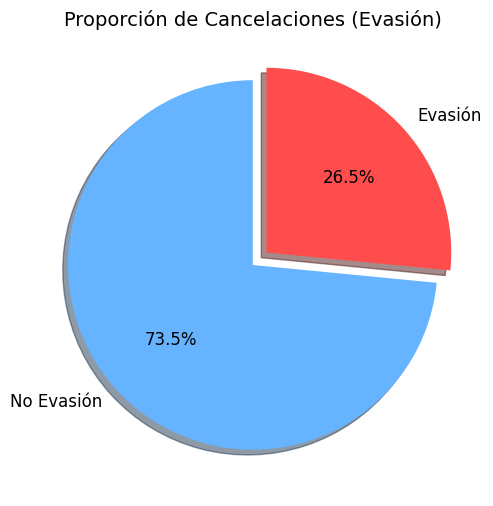

In [18]:
counts = datos_tratados['Evasion'].value_counts()
labels = ['No Evasión', 'Evasión']
colors = ['#66b3ff', '#ff4d4d']
explode = (0, 0.1)

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=explode, shadow=True, textprops={'fontsize': 12})
plt.title('Proporción de Cancelaciones (Evasión)', fontsize=14)
plt.show()

In [19]:
X = datos_tratados.drop(columns=['Evasion'])
y = datos_tratados['Evasion']

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

datos_balanceados = pd.DataFrame(X_res, columns=X.columns)
datos_balanceados['Evasion'] = y_res

print(y_res.value_counts(normalize=True) * 100)

Evasion
0    50.0
1    50.0
Name: proportion, dtype: float64


In [20]:
numericas = datos_balanceados.select_dtypes(include=['int64', 'float64'])

numericas.describe().T

count         mean          std    min  \
AdultoMayor                      10348.0     0.135388     0.342155   0.00   
TienePareja                      10348.0     0.379010     0.485164   0.00   
TieneDependientes                10348.0     0.217627     0.412652   0.00   
MesesCliente                     10348.0    27.655102    23.987864   0.00   
SuscripcionTelefono              10348.0     0.897082     0.303867   0.00   
LineasMultiples                  10348.0     0.384905     0.486596   0.00   
SeguridadOnline                  10348.0     0.207673     0.405661   0.00   
RespaldoOnline                   10348.0     0.276382     0.447230   0.00   
ProteccionDispositivo            10348.0     0.273579     0.445817   0.00   
SoporteTecnico                   10348.0     0.210572     0.407735   0.00   
TVCable                          10348.0     0.357750     0.479361   0.00   
PeliculasStreaming               10348.0     0.360649     0.480212   0.00   
FacturaDigital                   10348.0     0.597120     0.490501   0.00   
CargoMensual                     10348.0    68.033619    28.716511  18.25   
CargoTotal                       10348.0  2046.822222  2187.059386   0.00   
Internet_Fibra                   10348.0     0.511307     0.499896   0.00   
SinInternet                      10348.0     0.161867     0.368347   0.00   
Contrato_1Año                    10348.0     0.149208     0.356310   0.00   
Contrato_2Años                   10348.0     0.165056     0.371249   0.00   
Pago_TarjetaCredito(automatico)  10348.0     0.152880     0.359889   0.00   
Pago_ChequeElectronico           10348.0     0.350889     0.477271   0.00   
Pago_ChequeFisico                10348.0     0.177232     0.381884   0.00   
Genero_Male                      10348.0     0.431098     0.495254   0.00   
Evasion                          10348.0     0.500000     0.500024   0.00   

                                        25%          50%          75%      max  
AdultoMayor                        0.000000     0.000000     0.000000     1.00  
TienePareja                        0.000000     0.000000     1.000000     1.00  
TieneDependientes                  0.000000     0.000000     0.000000     1.00  
MesesCliente                       5.000000    21.000000    49.000000    72.00  
SuscripcionTelefono                1.000000     1.000000     1.000000     1.00  
LineasMultiples                    0.000000     0.000000     1.000000     1.00  
SeguridadOnline                    0.000000     0.000000     0.000000     1.00  
RespaldoOnline                     0.000000     0.000000     1.000000     1.00  
ProteccionDispositivo              0.000000     0.000000     1.000000     1.00  
SoporteTecnico                     0.000000     0.000000     0.000000     1.00  
TVCable                            0.000000     0.000000     1.000000     1.00  
PeliculasStreaming                 0.000000     0.000000     1.000000     1.00  
FacturaDigital                     0.000000     1.000000     1.000000     1.00  
CargoMensual                      45.680695    74.750000    91.052339   118.75  
CargoTotal                       270.485480  1170.650731  3264.579644  8684.80  
Internet_Fibra                     0.000000     1.000000     1.000000     1.00  
SinInternet                        0.000000     0.000000     0.000000     1.00  
Contrato_1Año                      0.000000     0.000000     0.000000     1.00  
Contrato_2Años                     0.000000     0.000000     0.000000     1.00  
Pago_TarjetaCredito(automatico)    0.000000     0.000000     0.000000     1.00  
Pago_ChequeElectronico             0.000000     0.000000     1.000000     1.00  
Pago_ChequeFisico                  0.000000     0.000000     0.000000     1.00  
Genero_Male                        0.000000     0.000000     1.000000     1.00  
Evasion                            0.000000     0.500000     1.000000     1.00

Correlaciones con Evasion:
Evasion                            1.000000
Internet_Fibra                     0.327297
CargoMensual                       0.235712
Pago_ChequeElectronico             0.211195
FacturaDigital                     0.125506
AdultoMayor                        0.019489
SuscripcionTelefono               -0.013040
TVCable                           -0.016935
PeliculasStreaming                -0.019320
LineasMultiples                   -0.051439
Genero_Male                       -0.153962
Pago_ChequeFisico                 -0.195873
ProteccionDispositivo             -0.200083
RespaldoOnline                    -0.205717
CargoTotal                        -0.230041
Pago_TarjetaCredito(automatico)   -0.267995
Contrato_1Año                     -0.290215
SinInternet                       -0.301984
SoporteTecnico                    -0.305520
TienePareja                       -0.307555
TieneDependientes                 -0.308203
SeguridadOnline                   -0.309464
Contr

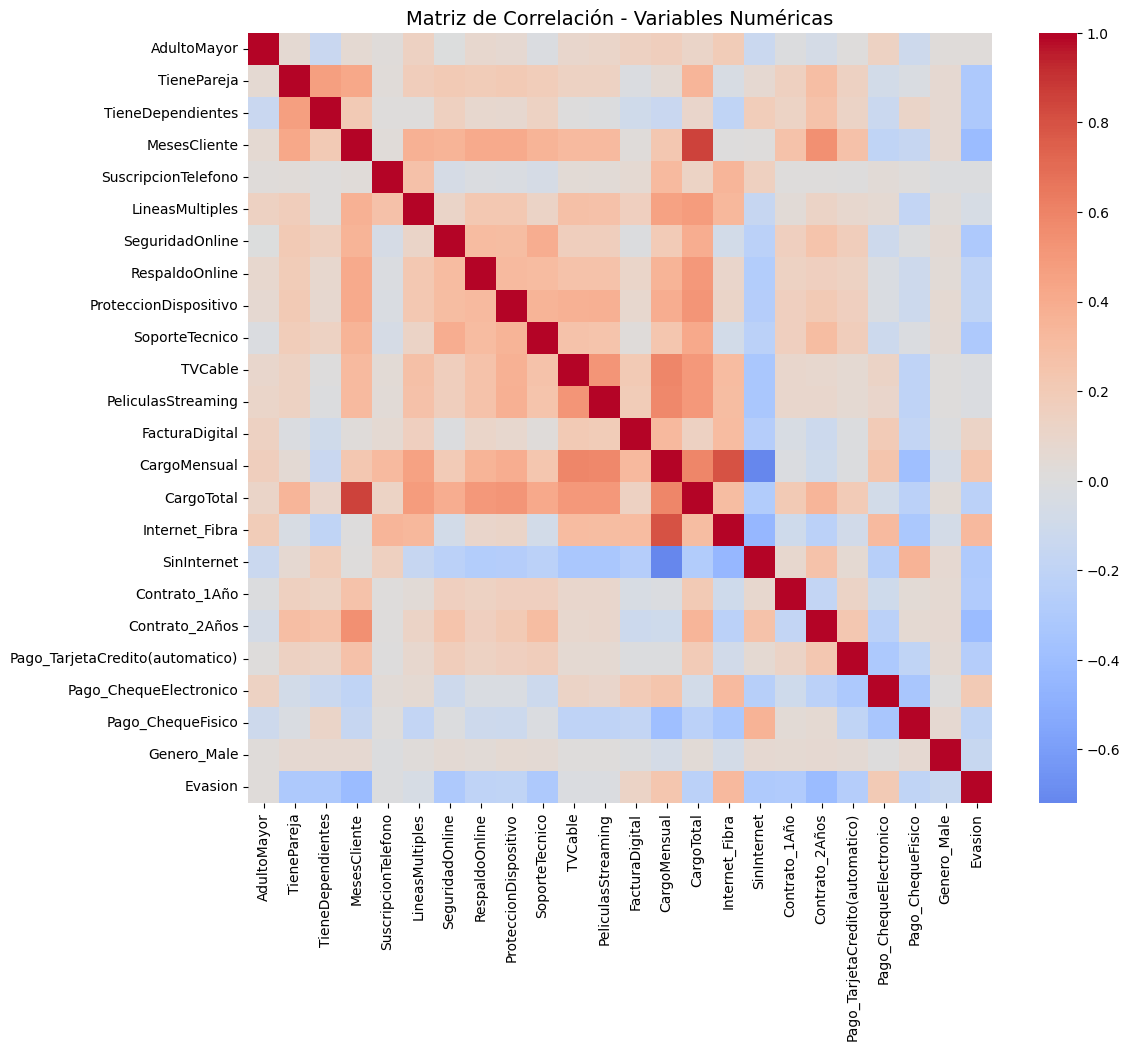

/tmp/ipython-input-2085989344.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_evasion.values, y=corr_evasion.index, palette="coolwarm")


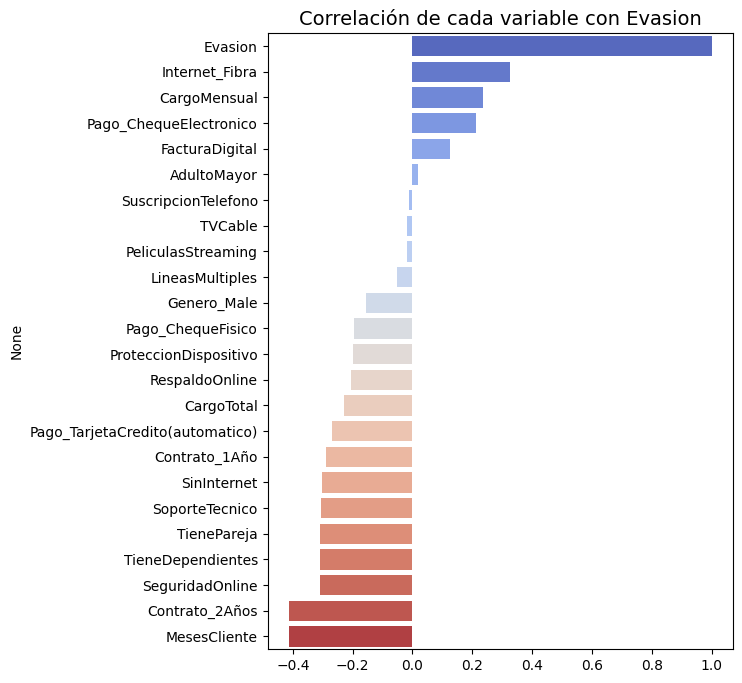

In [21]:
corr_matrix = datos_balanceados.corr()
corr_evasion = corr_matrix["Evasion"].sort_values(ascending=False)

print("Correlaciones con Evasion:")
print(corr_evasion)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=14)
plt.show()

plt.figure(figsize=(6, 8))
sns.barplot(x=corr_evasion.values, y=corr_evasion.index, palette="coolwarm")
plt.title("Correlación de cada variable con Evasion", fontsize=14)
plt.show()


/tmp/ipython-input-3506159712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='MesesCliente', data=datos_balanceados, palette='Set2')


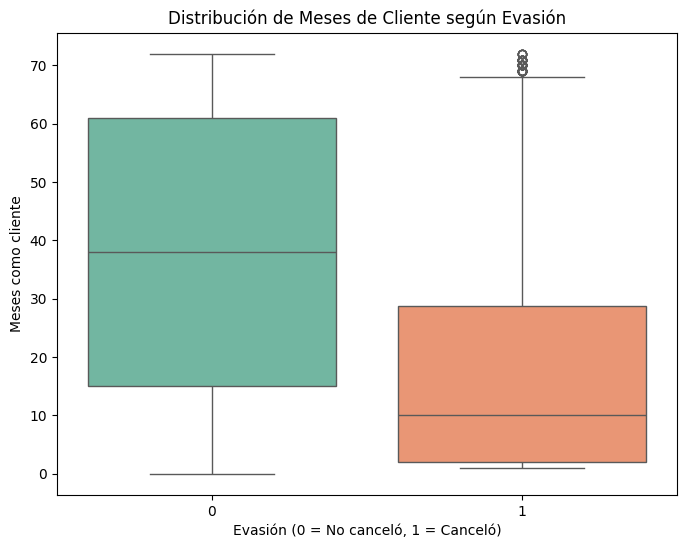

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Evasion', y='MesesCliente', data=datos_balanceados, palette='Set2')
plt.title('Distribución de Meses de Cliente según Evasión')
plt.xlabel('Evasión (0 = No canceló, 1 = Canceló)')
plt.ylabel('Meses como cliente')
plt.show()

/tmp/ipython-input-2217462708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contrato_1Año', y='Evasion', data=datos_balanceados, estimator=lambda x: 100 * sum(x) / len(x), ax=axes[0], palette='Set2')
/tmp/ipython-input-2217462708.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contrato_2Años', y='Evasion', data=datos_balanceados, estimator=lambda x: 100 * sum(x) / len(x), ax=axes[1], palette='Set2')


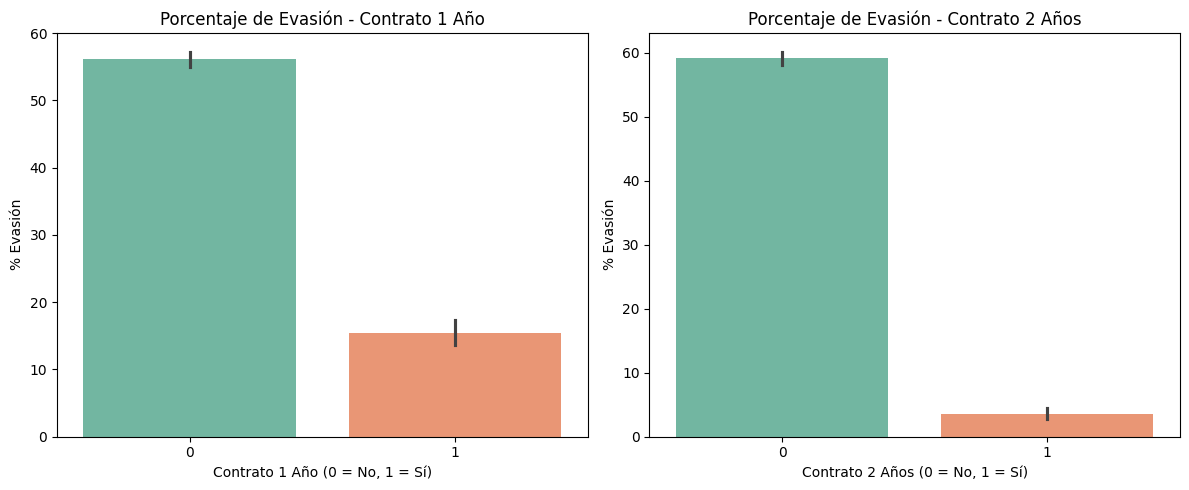

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Contrato 1 Año
sns.barplot(x='Contrato_1Año', y='Evasion', data=datos_balanceados, estimator=lambda x: 100 * sum(x) / len(x), ax=axes[0], palette='Set2')
axes[0].set_title('Porcentaje de Evasión - Contrato 1 Año')
axes[0].set_ylabel('% Evasión')
axes[0].set_xlabel('Contrato 1 Año (0 = No, 1 = Sí)')

# Contrato 2 Años
sns.barplot(x='Contrato_2Años', y='Evasion', data=datos_balanceados, estimator=lambda x: 100 * sum(x) / len(x), ax=axes[1], palette='Set2')
axes[1].set_title('Porcentaje de Evasión - Contrato 2 Años')
axes[1].set_ylabel('% Evasión')
axes[1].set_xlabel('Contrato 2 Años (0 = No, 1 = Sí)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2187759865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Internet_Fibra', y='Evasion',
/tmp/ipython-input-2187759865.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pago_ChequeElectronico', y='Evasion',
/tmp/ipython-input-2187759865.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasion', y='CargoMensual',


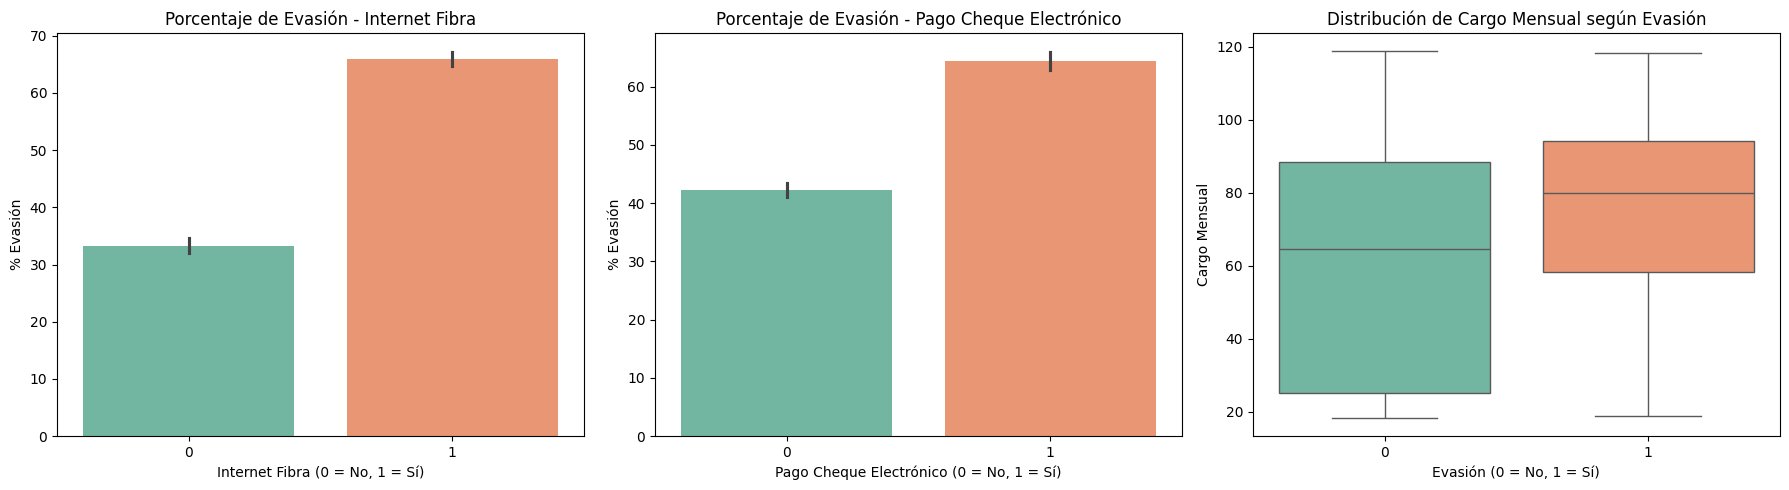

In [24]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Internet_Fibra
sns.barplot(x='Internet_Fibra', y='Evasion',
            data=datos_balanceados,
            estimator=lambda x: 100 * sum(x) / len(x),
            ax=axes[0], palette='Set2')
axes[0].set_title('Porcentaje de Evasión - Internet Fibra')
axes[0].set_ylabel('% Evasión')
axes[0].set_xlabel('Internet Fibra (0 = No, 1 = Sí)')

# Pago_ChequeElectronico
sns.barplot(x='Pago_ChequeElectronico', y='Evasion',
            data=datos_balanceados,
            estimator=lambda x: 100 * sum(x) / len(x),
            ax=axes[1], palette='Set2')
axes[1].set_title('Porcentaje de Evasión - Pago Cheque Electrónico')
axes[1].set_ylabel('% Evasión')
axes[1].set_xlabel('Pago Cheque Electrónico (0 = No, 1 = Sí)')

# CargoMensual
sns.boxplot(x='Evasion', y='CargoMensual',
            data=datos_balanceados,
            palette='Set2', ax=axes[2])
axes[2].set_title('Distribución de Cargo Mensual según Evasión')
axes[2].set_xlabel('Evasión (0 = No, 1 = Sí)')
axes[2].set_ylabel('Cargo Mensual')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1969529400.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1969529400.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1969529400.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1969529400.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1969529400.py:20: FutureWarning: 

Passing `

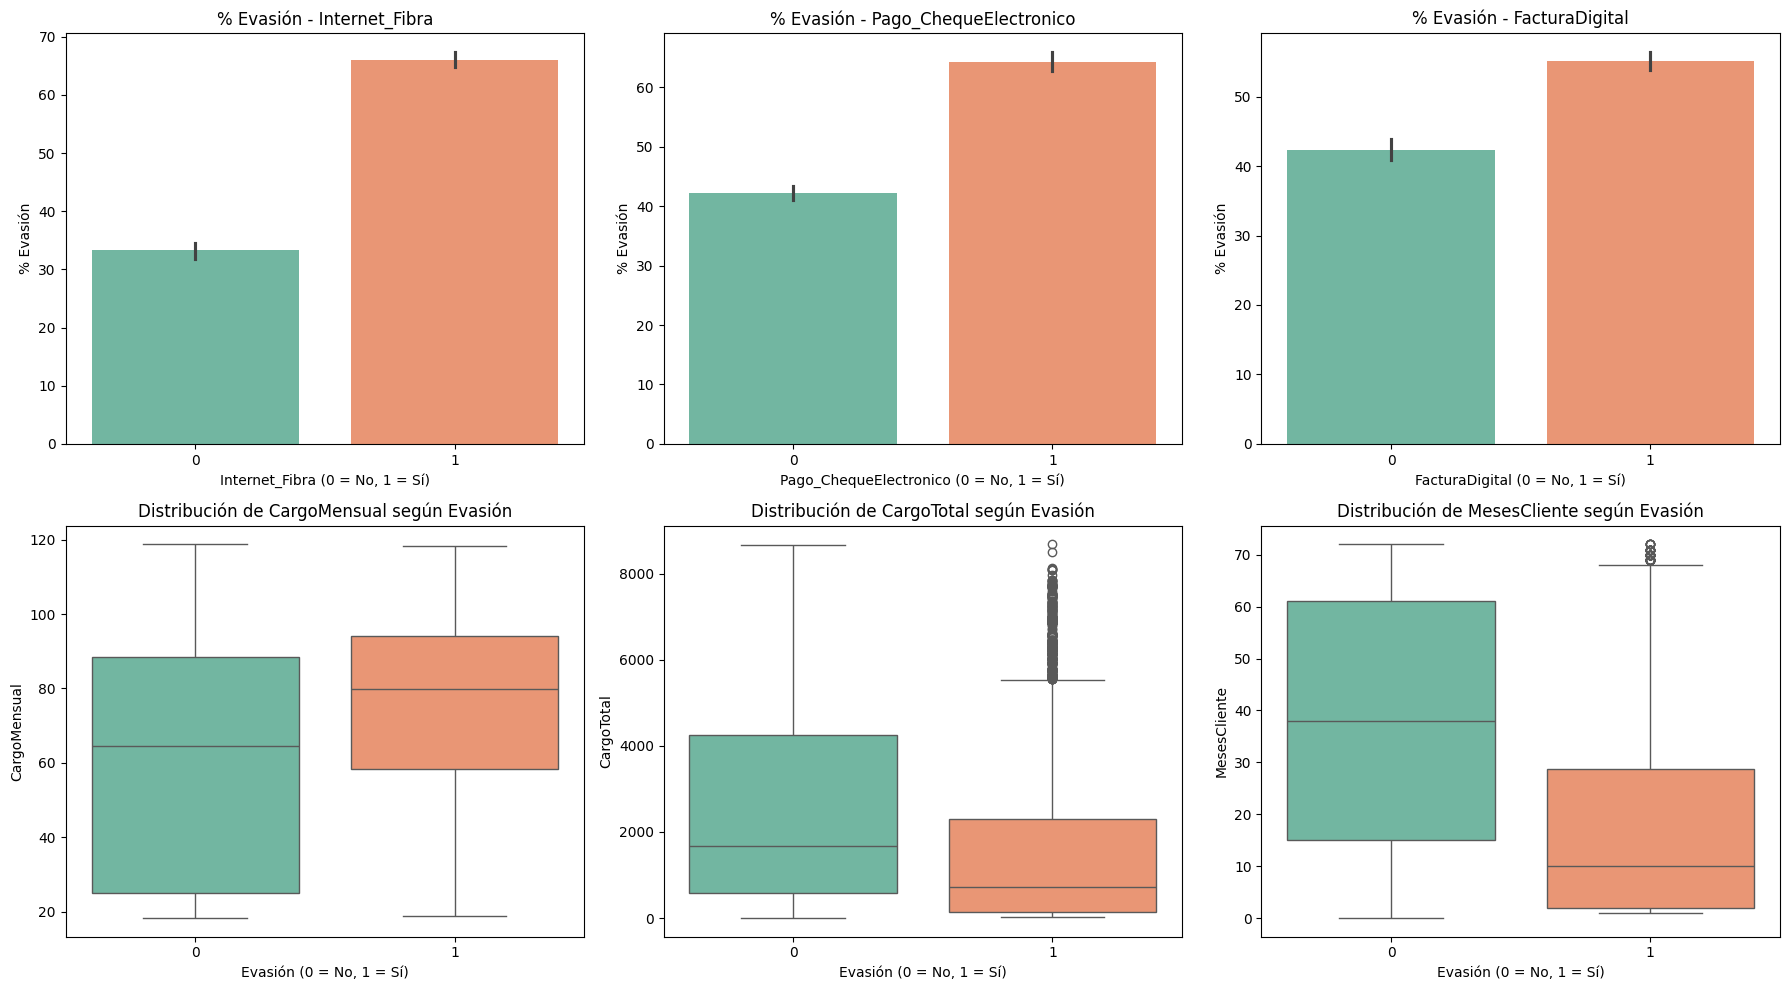

In [25]:
vars_binarias = ['Internet_Fibra', 'Pago_ChequeElectronico', 'FacturaDigital']
vars_continuas = ['CargoMensual', 'CargoTotal', 'MesesCliente']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, var in enumerate(vars_binarias):
    sns.barplot(
        x=var,
        y='Evasion',
        data=datos_balanceados,
        estimator=lambda x: 100 * sum(x) / len(x),
        palette='Set2',
        ax=axes[0, i]
    )
    axes[0, i].set_title(f'% Evasión - {var}')
    axes[0, i].set_ylabel('% Evasión')
    axes[0, i].set_xlabel(var + " (0 = No, 1 = Sí)")

for i, var in enumerate(vars_continuas):
    sns.boxplot(
        x='Evasion',
        y=var,
        data=datos_balanceados,
        palette='Set2',
        ax=axes[1, i]
    )
    axes[1, i].set_title(f'Distribución de {var} según Evasión')
    axes[1, i].set_xlabel('Evasión (0 = No, 1 = Sí)')
    axes[1, i].set_ylabel(var)

plt.tight_layout()
plt.show()

3. Modelado Predictivo

In [26]:
X = datos_balanceados.drop('Evasion', axis=1)
y = datos_balanceados['Evasion']

# Dividimos en entrenamiento y prueba70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño de prueba: {X_test.shape[0]} filas")


Tamaño de entrenamiento: 7243 filas
Tamaño de prueba: 3105 filas


Árbol de Decisión

In [27]:
modelo_arbol = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,     # profundidad de 4
    random_state=42
)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [28]:
modelo_arbol.score(X_train, y_train)

0.788485434212343

Matriz de Confusión:
[[1095  458]
 [ 235 1317]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1553
           1       0.74      0.85      0.79      1552

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

Exactitud (Accuracy): 0.7768


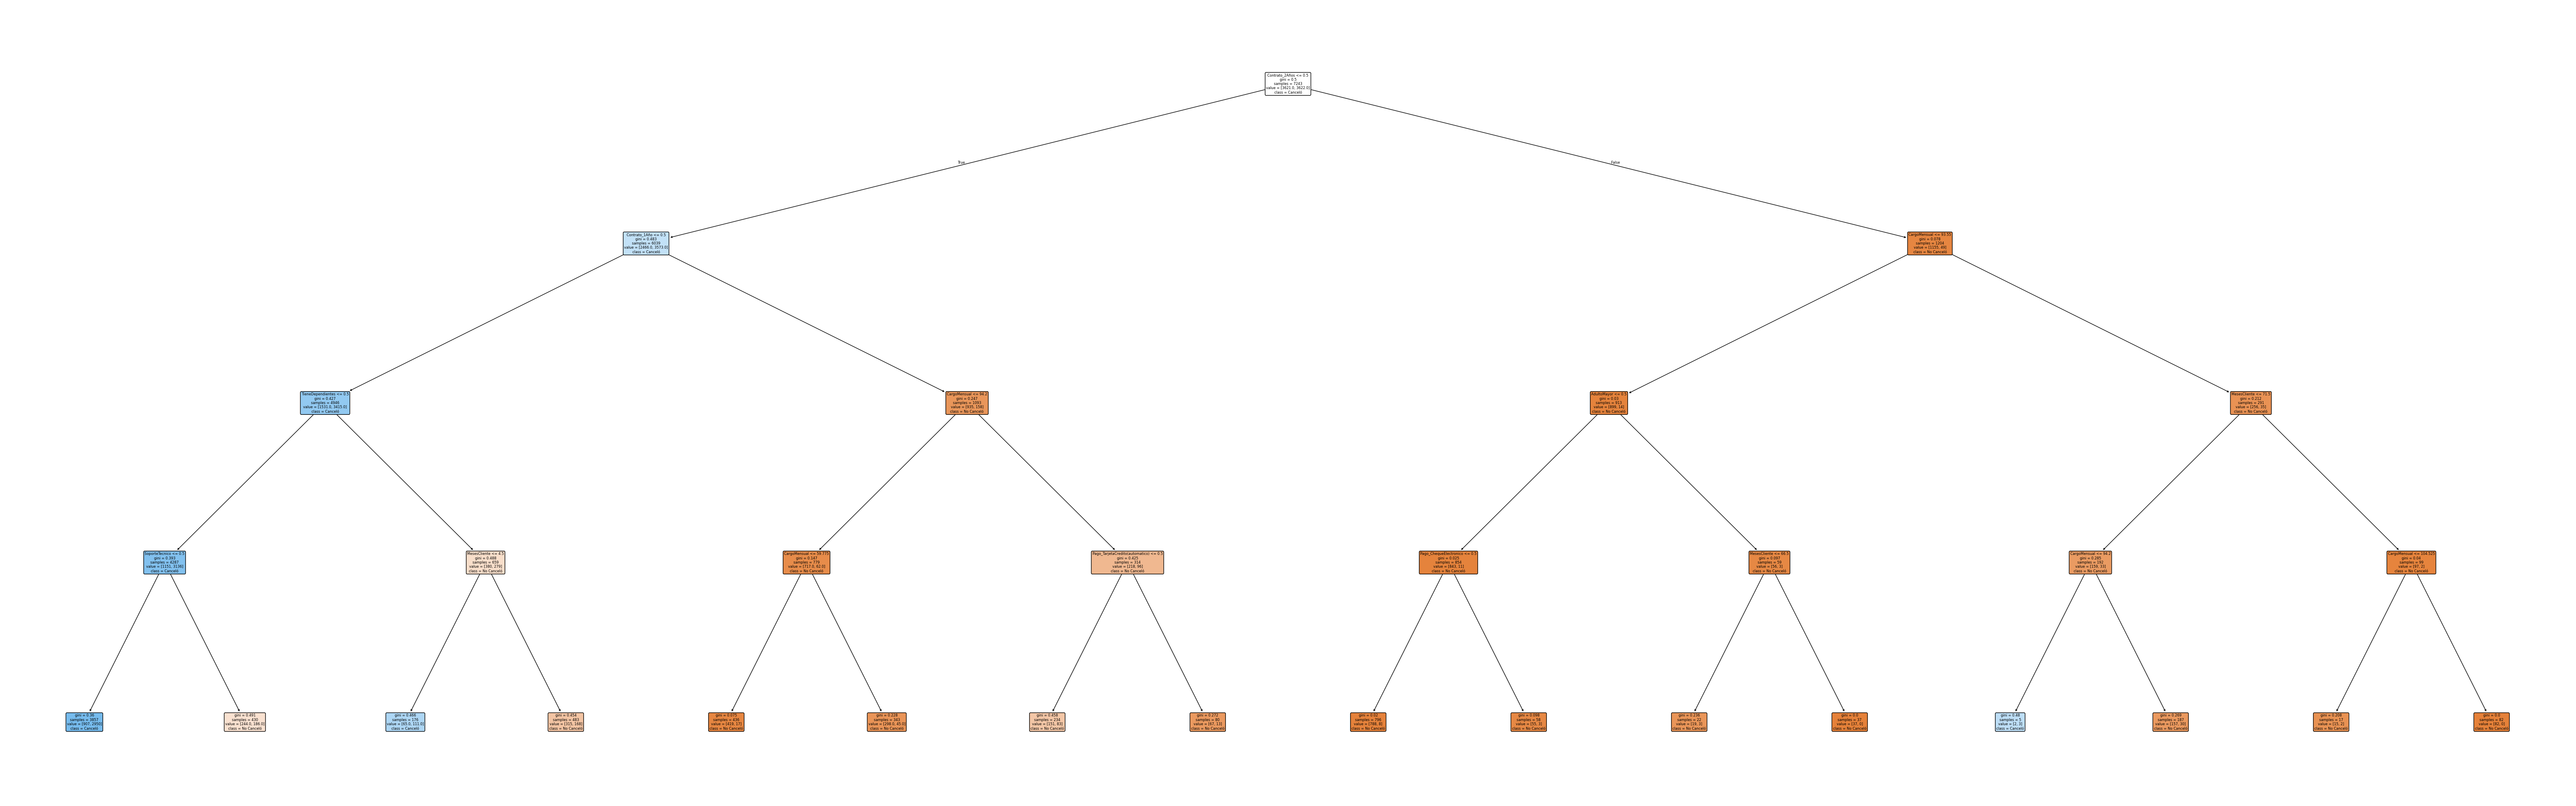

In [29]:
y_pred_arbol = modelo_arbol.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))

print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_arbol):.4f}")


plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          feature_names=X.columns,
          class_names=['No Canceló', 'Canceló'],
          filled=True,
          rounded=True,
          fontsize=6,
          max_depth=4)  # Limitar a profundidad 4
plt.show()


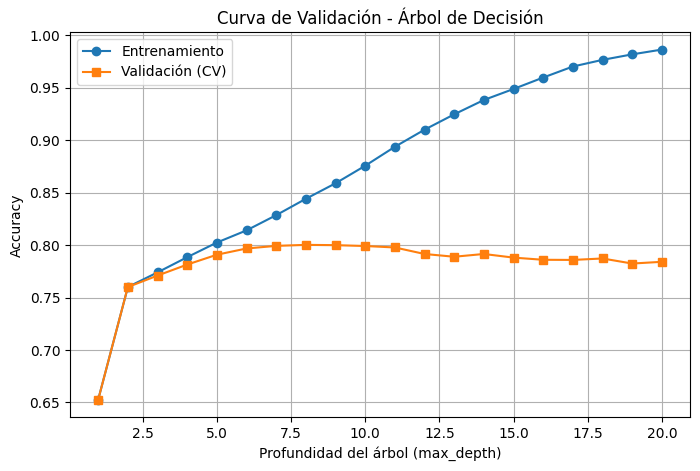

In [30]:
profundidades = range(1, 21)

train_scores = []
test_scores = []

for d in profundidades:
    modelo = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')

    test_scores.append(scores.mean())

    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))

plt.figure(figsize=(8,5))
plt.plot(profundidades, train_scores, label="Entrenamiento", marker='o')
plt.plot(profundidades, test_scores, label="Validación (CV)", marker='s')
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Curva de Validación - Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
modelo_arbol = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,     # profundidad de 10
    random_state=42
)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [32]:
modelo_arbol.score(X_train, y_train)

0.875604031478669

Matriz de Confusión:
[[1115  438]
 [ 193 1359]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1553
           1       0.76      0.88      0.81      1552

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105

Exactitud (Accuracy): 0.7968


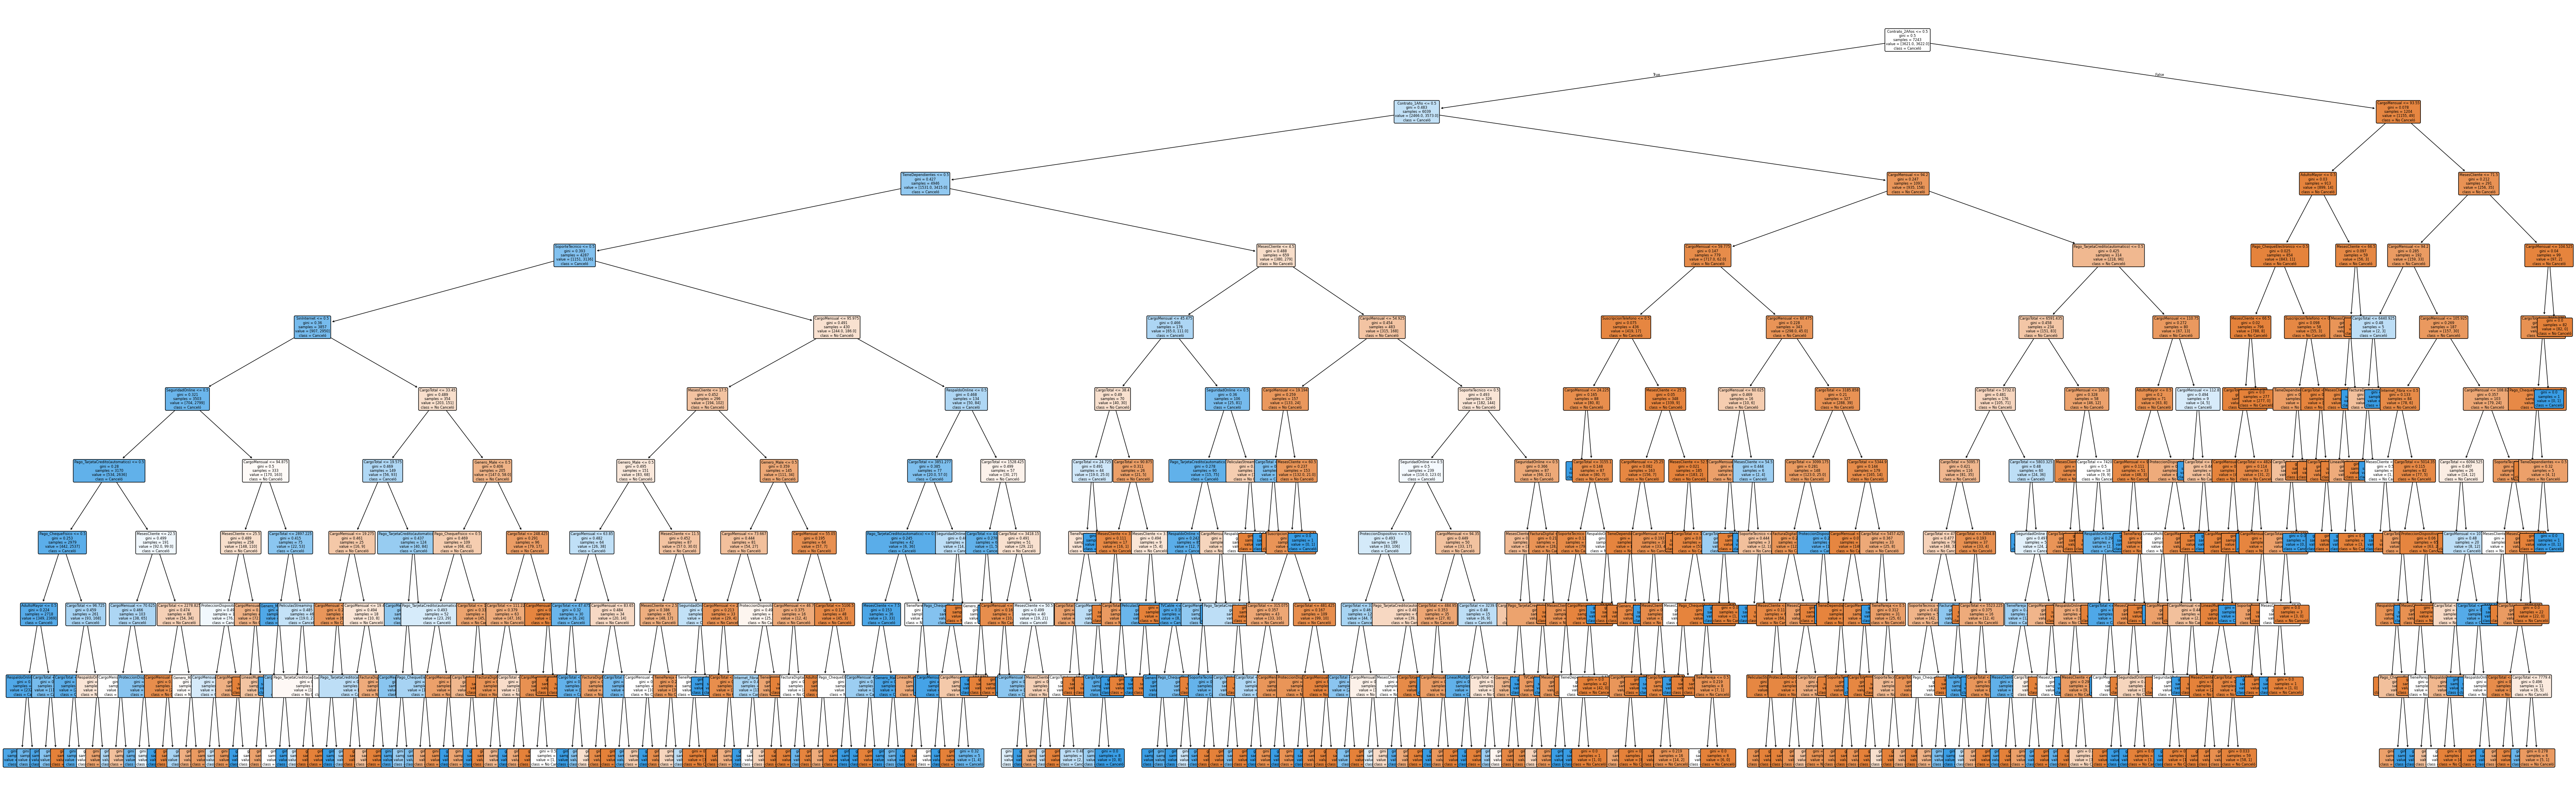

In [33]:
y_pred_arbol = modelo_arbol.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_arbol))

print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_arbol):.4f}")


plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,
          feature_names=X.columns,
          class_names=['No Canceló', 'Canceló'],
          filled=True,
          rounded=True,
          fontsize=6,
          max_depth=10)  # Limitar a profundidad 10
plt.show()


Random Forest

In [34]:
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [35]:
modelo_rf.score(X_train, y_train)


0.89134336600856

In [36]:
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

print("Exactitud (Accuracy): {:.4f}".format(accuracy_score(y_test, y_pred_rf)))

Matriz de Confusión:
[[1204  349]
 [ 179 1373]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1553
           1       0.80      0.88      0.84      1552

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

Exactitud (Accuracy): 0.8300
